# Multi Perceptron

In [73]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns;sns.set()

test_inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
correct_outputs = [0, 1, 1, 0]

inputs = pd.DataFrame(np.c_[test_inputs, correct_outputs], columns=['A', 'B', 'C'])

model = MLPClassifier(alpha=0.1, max_iter=50,  solver='lbfgs', early_stopping=True)

model.fit(test_inputs, correct_outputs)

print(model.n_layers_, model.n_iter_, model.score(test_inputs, correct_outputs), model.get_params())

3 52 1.0 {'activation': 'relu', 'alpha': 0.1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 50, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


# Descion Tree
Choose features that maxime the information gain (based on the entropy) to split on.

The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

https://scikit-learn.org/stable/modules/tree.html 

In [76]:
df = pd.read_csv('./datasets/recommending_app.csv')

clf = tree.DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)    

genderLabelEncoder = LabelEncoder()
occupationLabelEncoder = LabelEncoder()
X = np.c_[df[['Gender']].apply(genderLabelEncoder.fit_transform), df[['Occupation']]
          .apply(occupationLabelEncoder.fit_transform)]

appLabelEncoder = LabelEncoder()
y = df[['App']].apply(appLabelEncoder.fit_transform)

clf = clf.fit(X, y)

print(genderLabelEncoder.classes_, occupationLabelEncoder.classes_)

['F' 'M'] ['Study' 'Work']


**Understanding the decision tree structure**

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

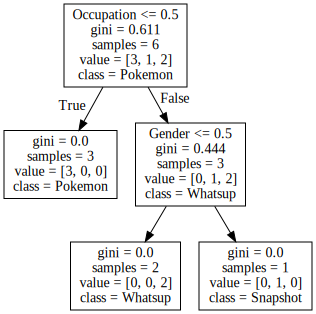

In [77]:
from graphviz import Source
from IPython.display import SVG
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=['Gender', 'Occupation'], class_names=appLabelEncoder.classes_))
SVG(graph.pipe(format='svg'))